### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


### Load the dataset

In [2]:
data = pd.read_csv('FinalDataset.csv')
data

Start Timestamp  End Timestamp     Mean    Max  Standard Deviation  \
0                1.005          1.997  3.17224   5.81            2.116479   
1                1.504          2.492 -0.25152   4.97            2.553746   
2                1.997          2.993 -2.57304  -0.94            0.511375   
3                2.492          3.492 -2.24136  -1.19            0.592439   
4                2.993          3.996 -1.26816  -0.37            0.544954   
...                ...            ...      ...    ...                 ...   
12977           65.118         66.115  0.38208  11.75            6.731424   
12978           65.618         66.609  0.71152  11.75            6.440257   
12979           66.115         67.109  0.63640  13.72            6.818053   
12980           66.609         67.605  0.87304  13.72            6.753390   
12981           67.109         68.104  0.45528  13.22            6.718356   

            RMS  Kurtosis  Skewness  Peak-to-Peak  Abs Diff Signal  ...  \
0      3.813475 -1.139828 -0.407959          6.78            12.51  ...   
1      2.566102 -1.043102  0.577409          8.25             9.68  ...   
2      2.623364  1.136639  1.290946          2.34             7.37  ...   
3      2.318335 -1.276943  0.142333          1.94             8.12  ...   
4      1.380292 -1.172872 -0.251960          1.88             7.48  ...   
...         ...       ...       ...           ...              ...  ...   
12977  6.742259 -1.189050 -0.109198         24.78           814.74  ...   
12978  6.479443 -1.134745 -0.149109         23.72           786.82  ...   
12979  6.847690 -1.168875 -0.094740         25.97           831.02  ...   
12980  6.809587 -1.187458 -0.085022         25.97           814.78  ...   
12981  6.733765 -1.069227 -0.107674         27.44           807.54  ...   

         FFT_116    FFT_117    FFT_118    FFT_119    FFT_120    FFT_121  \
0       3.491304   4.499943   4.796797   6.354283   7.887080  11.478673   
1      18.893999  21.130172  21.896142  27.830085  32.080842  41.769792   
2       1.092225   3.271215   3.172364   5.703337   5.820801   7.097514   
3       2.437602   5.565809   4.484336   4.958172   8.863119   8.983071   
4       4.806898   5.320898   4.703393   4.754043   6.530838   8.330221   
...          ...        ...        ...        ...        ...        ...   
12977  34.662622  12.394128  47.965363  41.218862  20.670627  28.899447   
12978  23.390898   7.892048  15.475986  16.346004  16.576064  16.540832   
12979  34.632049  48.617911  25.654137  19.908644  34.790443  19.485490   
12980  35.457790  42.469282  18.837095  44.945967  14.876013  46.888112   
12981  28.536408  19.598634  91.009036  50.464825   6.454186  30.808565   

         FFT_122    FFT_123     FFT_124  Label  
0      19.052146  41.639898  180.335878      0  
1      53.919164  82.934784  183.133061      0  
2       9.443354  14.057565   38.968389      0  
3      12.314302  20.572591   41.745039      0  
4      12.191309  19.017916   38.078630      0  
...          ...        ...         ...    ...  
12977   7.686803  30.486825  159.166327      2  
12978  33.187158  14.516370  138.241919      2  
12979  44.251502  35.652144  121.690653      2  
12980  27.038889  21.691262  143.498148      2  
12981  35.301317   5.898044  141.394902      2  

[12982 rows x 153 columns]

In [3]:
data.Label.value_counts()

Label
2    4565
1    4311
0    4106
Name: count, dtype: int64

### Balancing the dataset

In [4]:
from sklearn.utils import resample

label_counts = data.Label.value_counts()
# Find the minimum count
min_count = label_counts.min()

# Create an empty DataFrame to store balanced data
balanced_df = pd.DataFrame()

# Iterate over each label
for label in label_counts.index:
    # Sample the data for the current label to make its count equal to min_count
    sampled_data = resample(data[data['Label'] == label], replace=False, n_samples=min_count, random_state=42)
    # Append the sampled data to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, sampled_data])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the value counts to verify the balance
print("Previous Dataset label spread\n", data['Label'].value_counts())
print("New Dataset label spread\n", balanced_df['Label'].value_counts())

data = balanced_df

Previous Dataset label spread
 Label
2    4565
1    4311
0    4106
Name: count, dtype: int64
New Dataset label spread
 Label
0    4106
2    4106
1    4106
Name: count, dtype: int64


### Separate features and target variable

In [6]:
# Initialize the scaler

# Fit and transform the features (X)

X = data.drop(columns=["Label"])  # Assuming "Label" column is the target variable
# X = scaler.fit_transform(X)
y = data["Label"]

In [7]:
X.head(4).to_csv("gpt.csv")

### Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Engineering

In [9]:
# testing reliablilty of FFTS on the dataset
X_ffts_train = X_train.loc[: , "FFT_0":"FFT_124"]
X_ffts_test = X_test.loc[: , "FFT_0":"FFT_124"]

### Initialize the Random Forest Classifier

In [10]:
rf_classifier = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150)

## Train the classifier

In [18]:

# selected_features_rf = ['Start Timestamp',
#  'FFT_121',
#  'FFT_24',
#  'Zero Crossing Rate',
#  'Beta Power',
#  'FFT_123',
#  'FFT_2',
#  'Skewness',
#  'FFT_100',
#  'End Timestamp',
#  'FFT_25',
#  'Max',
#  'Kurtosis',
#  'FFT_4',
#  'FFT_120',
#  'FFT_5',
#  'Entropy',
#  'Peak-to-Peak',
#  'FFT_98',
#  'FFT_1',
#  'FFT_27',
#  'Abs Diff Signal',
#  'Delta Power',
#  'FFT_101',
#  'Standard Deviation',
#  'Spectral Spread',
#  'FFT_26',
#  'RMS']
# selected_features_mi = ['Max', 'Peak-to-Peak', 'Abs Diff Signal', 'FFT_24', 'FFT_101', 'RMS', 'FFT_25', 'FFT_100', 'Standard Deviation', 'Kurtosis', 'FFT_2', 'FFT_123', 'Beta Power', 'Spectral Spread', 'FFT_5', 'FFT_120', 'Skewness', 'FFT_4', 'FFT_121', 'Spectral Skewness', 'FFT_55', 'FFT_70', 'FFT_22', 'FFT_103', 'Entropy']
# selected_features = list(set(selected_features_rf) | set(selected_features_mi))
selected_features = ["Alpha Power"]
params  = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
rf_classifier = RandomForestClassifier(**params, random_state=40)

In [19]:
selected_features

['Alpha Power']

In [20]:
rf_classifier.fit(X_train_selected, y_train)

RandomForestClassifier(n_estimators=200, random_state=40)

### Predictions

In [21]:
y_pred = rf_classifier.predict(X_test_selected)

### Evaluate the classifier

In [22]:
y_test.shape, y_pred.shape

((2464,), (2464,))

Accuracy Score: 0.35186688311688313

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.36      0.37       852
           1       0.33      0.34      0.34       800
           2       0.35      0.35      0.35       812

    accuracy                           0.35      2464
   macro avg       0.35      0.35      0.35      2464
weighted avg       0.35      0.35      0.35      2464



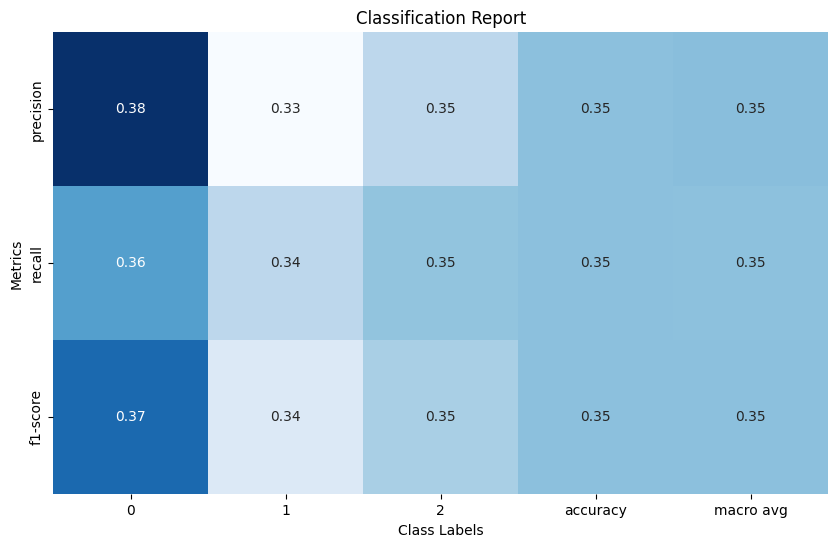

In [23]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Convert classification report to dataframe
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot classification report heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1].T, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Class Labels')
plt.ylabel('Metrics')
plt.title('Classification Report')
plt.show()

Confusion Matrix:
 [[306 285 261]
 [244 276 280]
 [255 272 285]]


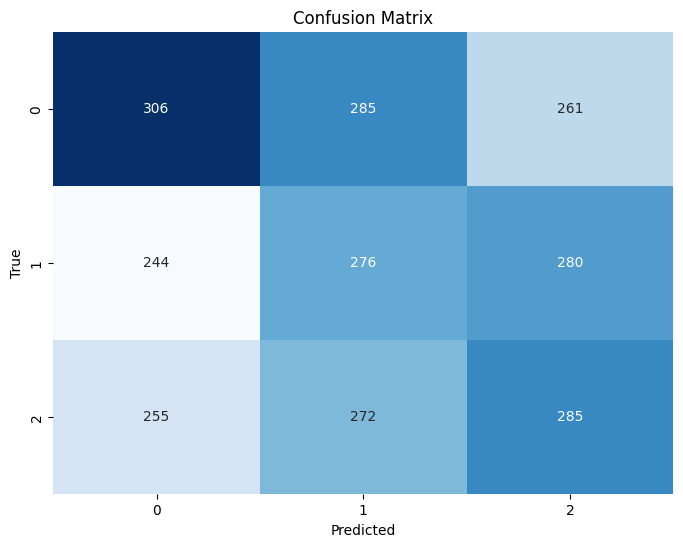

In [24]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


# Plotting confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Saving the Model

In [30]:
from joblib import dump

# Specify the file path where you want to save the model
model_file_path = "EEGCLASSIFIER.joblib"

# Save the model to the specified file path
dump(rf_classifier, model_file_path)

print("Model saved successfully.")


Model saved successfully.


### Feature importance

            Feature  Importance
0   Start Timestamp    0.021238
1     End Timestamp    0.020600
9   Abs Diff Signal    0.017409
6          Kurtosis    0.015300
7          Skewness    0.015114
..              ...         ...
72           FFT_51    0.003880
74           FFT_53    0.003847
75           FFT_54    0.003788
67           FFT_46    0.003784
84           FFT_63    0.003753

[121 rows x 2 columns]


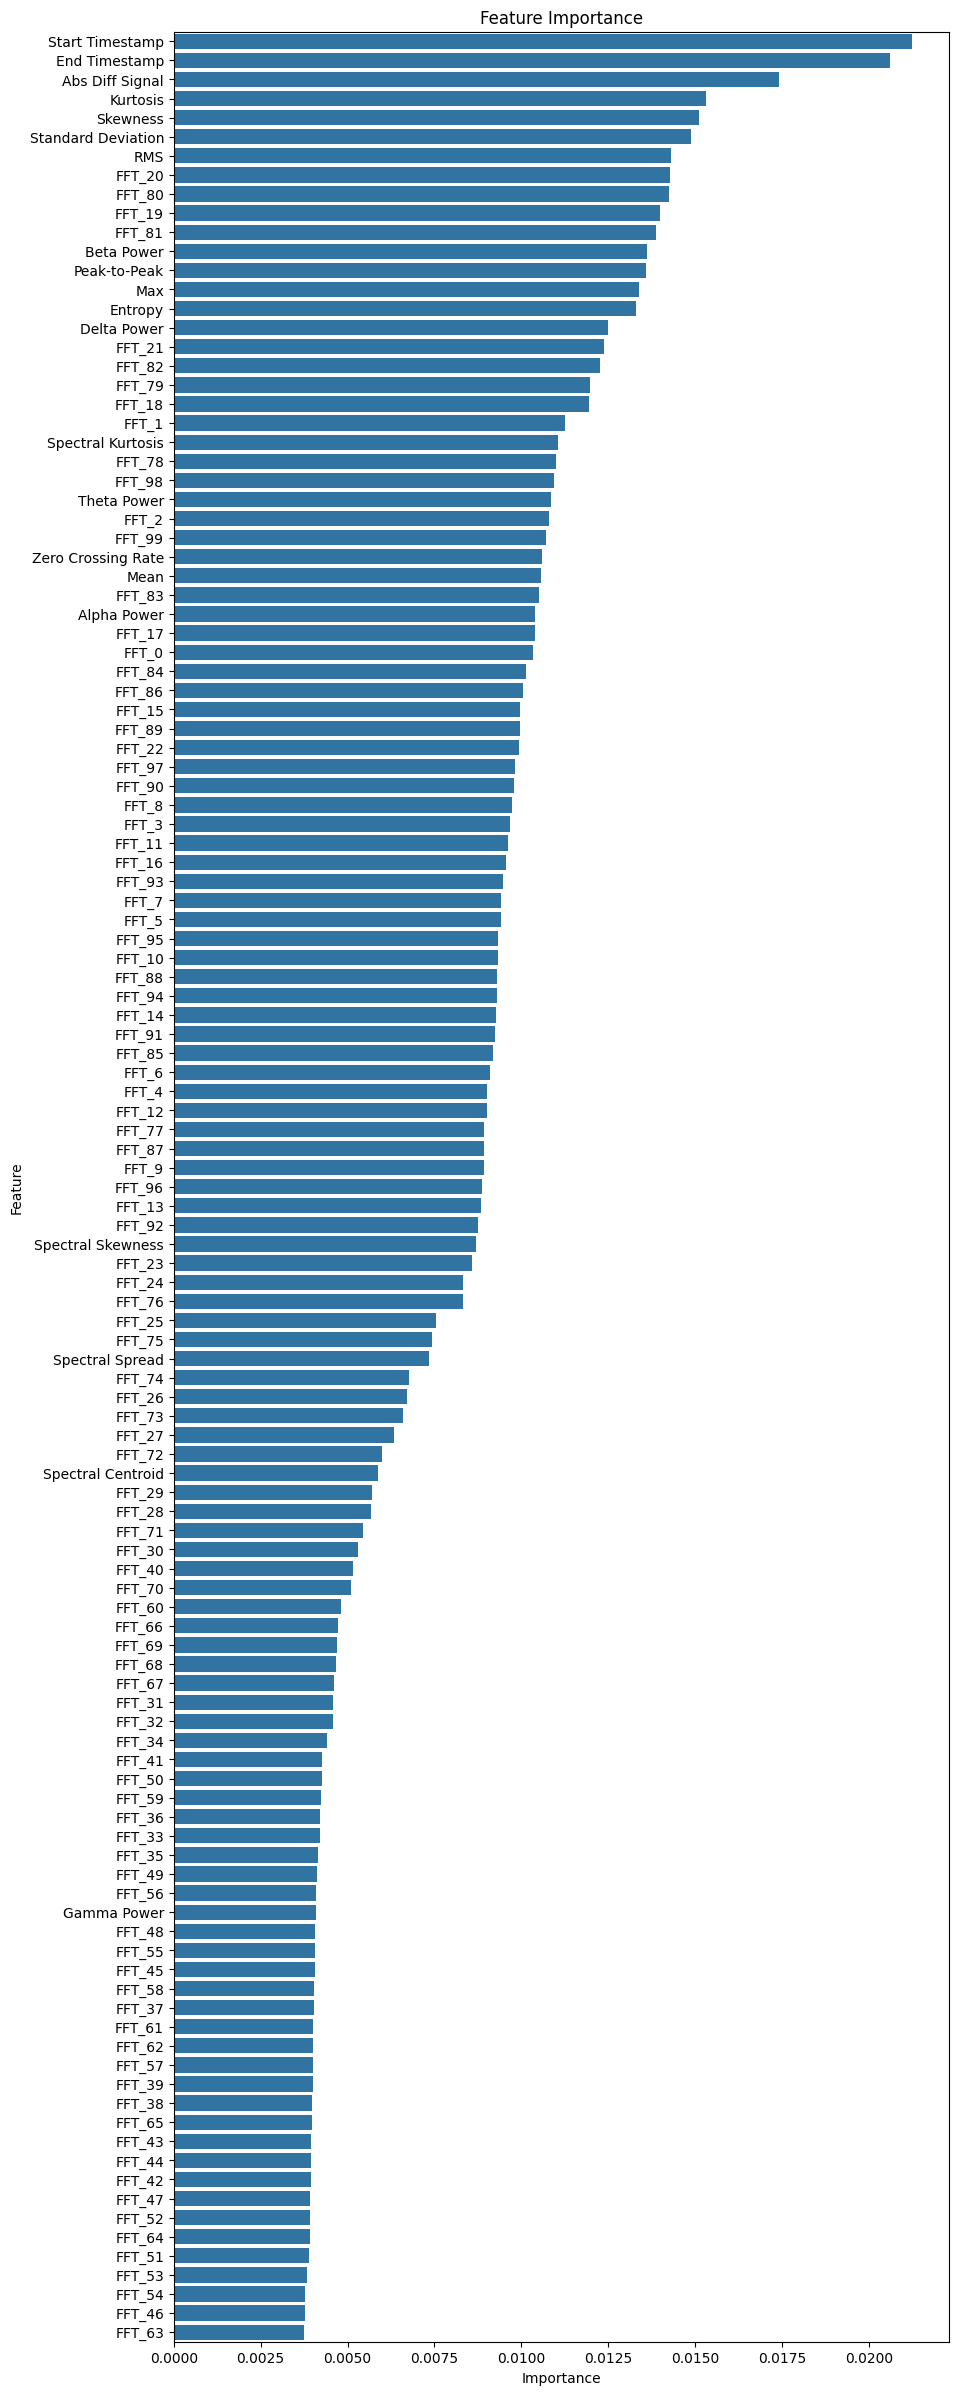

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = rf_classifier.feature_importances_
feature_names = data.columns[:-1]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 30))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


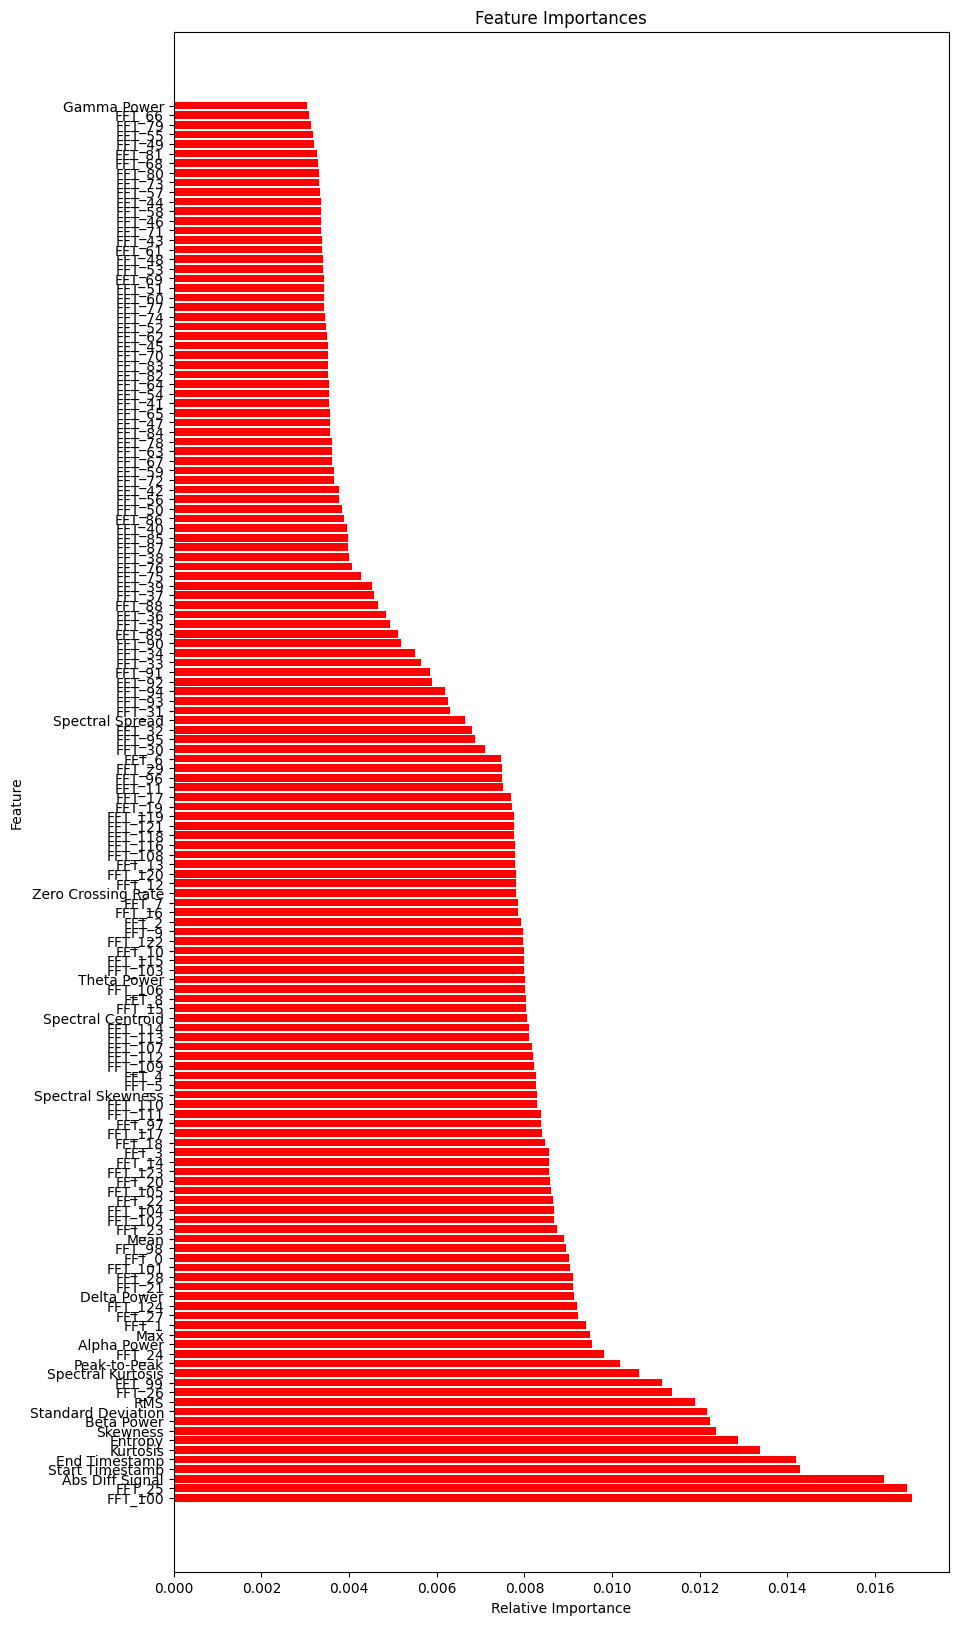

In [104]:
# Visualize individual trees in the forest
# Convert class labels to strings
class_names = [str(label) for label in rf_classifier.classes_]

# Visualize individual trees in the forest
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(50, 20), dpi=300)
plot_tree(rf_classifier.estimators_[0],
          feature_names=feature_names,
          class_names=class_names,  # Use the converted class labels
          filled=True)
plt.savefig("RandomForest.svg")
plt.show()


# Visualize feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 20))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", align="center")
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

Correlation with Target Variable:
 Label          1.000000
FFT_99         0.090365
FFT_26         0.090365
FFT_25         0.073964
FFT_100        0.073964
                 ...   
FFT_114        0.000814
Mean           0.000720
FFT_13         0.000539
FFT_112        0.000539
Delta Power    0.000485
Name: Label, Length: 147, dtype: float64
Feature Importance:
              Feature  Importance
121          FFT_100    0.016841
46            FFT_25    0.016737
9    Abs Diff Signal    0.016196
0    Start Timestamp    0.014288
1      End Timestamp    0.014204
..               ...         ...
70            FFT_49    0.003195
76            FFT_55    0.003185
100           FFT_79    0.003123
87            FFT_66    0.003082
18       Gamma Power    0.003044

[146 rows x 2 columns]


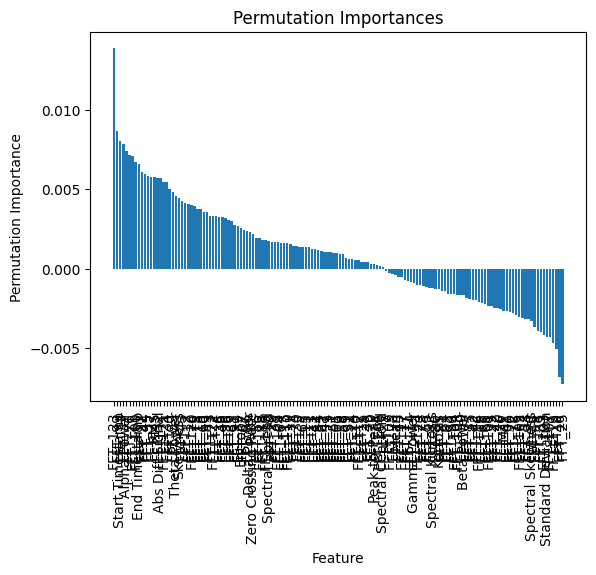

In [105]:
# Correlation Analysis
X = data.drop(columns=["Label"])
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Label'].abs().sort_values(ascending=False)
print("Correlation with Target Variable:\n", correlation_with_target)

# Feature Importance Algorithms (Random Forest already trained)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)

# Permutation Importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)
sorted_indices_perm = np.argsort(perm_importance.importances_mean)[::-1]
plt.bar(range(X_train.shape[1]), perm_importance.importances_mean[sorted_indices_perm])
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices_perm], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importances')
plt.show()

# Visualization Techniques
# Partial Dependence Plots (PDP)
# from sklearn.inspection import plot_partial_dependence
# plot_partial_dependence(rf_classifier, X_train, features=[0, 1, (0, 1)]) # Replace [0, 1, (0, 1)] with appropriate features

# # Individual Conditional Expectation (ICE) Plots
# from sklearn.inspection import plot_partial_dependence
# plot_partial_dependence(rf_classifier, X_train, features=[0, 1, (0, 1)], kind='individual') # Replace [0, 1, (0, 1)] with appropriate features

# # Pairwise Feature Plots (using seaborn pairplot)
# sns.pairplot(data, hue="Label")

# Domain Knowledge and Context
# Reviewing features based on domain knowledge and context
# You can inspect individual features or subsets of features based on your understanding of the problem domain and data collection process.

# Feature Engineering
# Apply feature engineering techniques such as transformation, feature combination, or dimensionality reduction (e.g., PCA) and observe their impact on model performance.

# Cross-validation
# Evaluate model performance using cross-validation and observe the effect of feature removal on performance across different folds.

# Iterative Process
# After identifying potentially irrelevant features, remove them and retrain the model to observe the impact on performance. Repeat this process iteratively until satisfactory results are achieved.


In [145]:
remove = (perm_importance.importances_mean>0)
remove = np.append(remove, True)

In [147]:
columns_to_keep = data.columns[remove]
filtered  = data[columns_to_keep]

In [148]:
filtered 

Start Timestamp  End Timestamp        RMS  Skewness  Peak-to-Peak  \
0              56.663         57.657   6.586921 -0.301240         38.03   
1              30.824         31.827   2.928740 -0.251067         13.66   
2              26.341         27.336   2.124834  0.105409          8.63   
3              60.640         61.639   8.707947  0.033452         39.31   
4              14.418         15.416   2.659314  0.002924         11.22   
...               ...            ...        ...       ...           ...   
5371           36.293         37.288   4.455763 -1.171618         26.59   
5372           29.828         30.827  23.133907  2.642268        126.50   
5373           59.639         60.633   2.114591 -0.287366         10.13   
5374           19.896         20.888   8.015189 -0.161803         32.07   
5375           42.756         43.744   5.578371  0.879539         33.97   

      Abs Diff Signal  Zero Crossing Rate   Entropy  Spectral Centroid  \
0              294.12            0.145161  4.472487      -1.833544e-16   
1              153.07            0.153226  4.566009      -1.091441e-16   
2              120.00            0.177419  4.575368      -3.719881e-16   
3              468.73            0.161290  4.567925       1.468687e-16   
4              121.87            0.088710  4.585414      -3.414818e-16   
...               ...                 ...       ...                ...   
5371           188.65            0.129032  4.536890      -1.589877e-17   
5372           371.17            0.056452  4.245768       8.347598e-17   
5373           125.81            0.161290  4.560117       2.538483e-16   
5374           968.30            0.395161  4.659279      -2.455279e-16   
5375           171.71            0.153226  4.233101      -8.292030e-17   

      Spectral Spread  ...     FFT_111     FFT_112     FFT_113     FFT_115  \
0           12.542221  ...   94.778973  227.458847   99.634589   63.797503   
1           14.220198  ...   92.285888   57.616798   41.496051   26.992003   
2           15.685954  ...   25.310156   48.262174   11.390455   17.291556   
3           12.984535  ...  431.789366  104.079131  246.833244  168.903128   
4           17.164704  ...   49.932165   35.232179   23.190359   26.582116   
...               ...  ...         ...         ...         ...         ...   
5371        15.660737  ...   58.578316   70.430798   58.157829   52.044587   
5372        13.060102  ...  196.700744  203.616814  212.039787  229.896907   
5373        16.640069  ...   28.720404   19.807956   24.118206   42.350622   
5374        25.128505  ...   10.339285   28.509924   15.310031   55.168455   
5375        12.035597  ...   78.491274   26.558079   90.378439   79.368549   

         FFT_118     FFT_120     FFT_121     FFT_122     FFT_123  Label  
0     145.298070  125.736093  119.061845  210.976441  200.145500      1  
1      99.635330  102.024844   49.060703   49.637092    9.497281      0  
2      45.377347   48.072754   64.819655   31.153198   31.865486      2  
3      96.915865  330.296667  267.959212  136.736969   64.165297      0  
4      15.547784   60.906142   37.507563   22.198011  115.985040      0  
...          ...         ...         ...         ...         ...    ...  
5371   93.903234  104.538514  157.237418    5.242497   74.581172      2  
5372  283.398571  402.773061  495.190440  623.675685  841.006355      0  
5373   54.646466   39.934795   41.620715   40.832102   53.683949      0  
5374    7.744503   49.564051   59.411449   39.163452   55.849591      0  
5375  112.290755  176.920632  198.134583  187.221545  197.264151      1  

[5376 rows x 89 columns]

In [149]:
filtered.to_csv("filtered.csv")